In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [77]:
test_images = np.load('k49/k49-test-imgs.npz')['arr_0']
test_labels = np.load('k49/k49-test-labels.npz')['arr_0']
train_images = np.load('k49/k49-train-imgs.npz')['arr_0']
train_labels = np.load('k49/k49-train-labels.npz')['arr_0']

In [78]:
print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)

(38547, 28, 28)
(38547,)
(232365, 28, 28)
(232365,)


In [79]:
df = pd.read_csv('./kmnist49/k49_classmap.csv')
def get_char(num):
    char = str(df.iloc[num, 2]) + " " + df.iloc[num, 3]
    print(char)

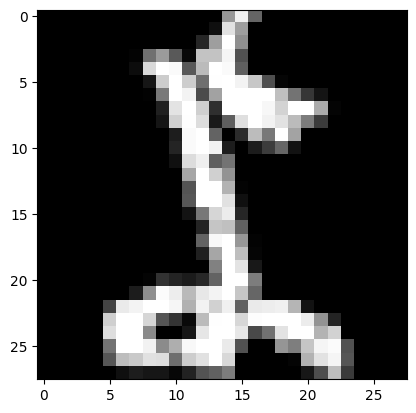

In [80]:
plt.imshow(test_images[100], cmap='gray')

plt.show()


In [81]:
get_char(test_labels[100])

よ yo


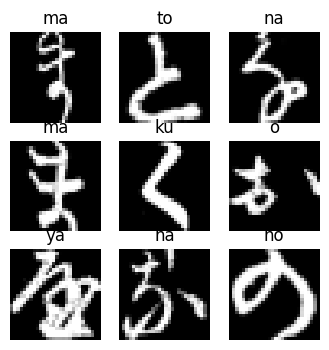

In [82]:
plt.figure(figsize=(4, 4))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(train_images[i]).astype("uint8"), cmap='gray')
    plt.title(df.iloc[train_labels[i], 3])
    plt.axis("off")

## Prepare the data

In [84]:
x_train = train_images / 255.
x_test = test_images / 255. 


In [85]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [86]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (232365, 28, 28, 1)
232365 train samples
38547 test samples


In [87]:
num_labels = 49
y_train = keras.utils.to_categorical(train_labels, num_labels)
y_test = keras.utils.to_categorical(test_labels, num_labels)

In [88]:
print("x_train shape:", y_train.shape)
print(y_train.shape[0], "train samples")
print(y_test.shape[0], "test samples")

x_train shape: (232365, 49)
232365 train samples
38547 test samples


In [89]:
from tensorflow.keras import layers

In [96]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 49)             │         6,321 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,577 (963.19 KB)

 Trainable params: 246,577 (963.19 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [98]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5490 - loss: 1.7438 - val_accuracy: 0.8972 - val_loss: 0.3770
Epoch 2/15
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8580 - loss: 0.5281 - val_accuracy: 0.9281 - val_loss: 0.2648
Epoch 3/15
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8986 - loss: 0.3732 - val_accuracy: 0.9405 - val_loss: 0.2208
Epoch 4/15
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9189 - loss: 0.3030 - val_accuracy: 0.9460 - val_loss: 0.1963
Epoch 5/15
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9300 - loss: 0.2577 - val_accuracy: 0.9512 - val_loss: 0.1797
Epoch 6/15
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9374 - loss: 0.2319 - val_accuracy: 0.9554 - val_loss: 0.1706
Epoch 7/15
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9431 - loss: 0.2091 - val_accuracy: 0.9570 - val_loss: 0.1627
Epoch 8/15
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9478 - 

In [99]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.298302561044693
Test accuracy: 0.9309933185577393


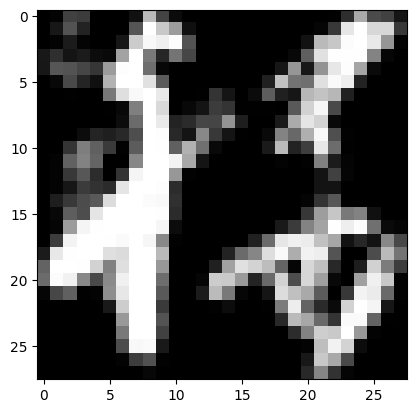

In [101]:
plt.imshow(test_images[1], cmap='gray')

plt.show()

In [102]:

predictions = model.predict(x_test[1:2])
cl = np.argmax(predictions[0])
print(cl)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
23


In [103]:
get_char(test_labels[1])
get_char(cl)

ね ne
ね ne


# Transfer learning